In [1]:
import pandas as pd

## 1. Read data and conduct initial exploration

In [2]:
data = pd.read_csv('train.tsv.zip',sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### How many reviews in total?

In [3]:
len(data)

156060

### How many reviews in each rating?

In [4]:
data.groupby('Sentiment').count()

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


### Average length in number of characters of a review?

In [5]:
data['Length_char'] = data.Phrase.apply(len)
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length_char
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6


In [6]:
data['Length_char'].mean()

40.217224144559786

### Average length in each rating?

In [7]:
data.groupby('Sentiment').agg('mean')

,PhraseId,SentenceId,Length_char
Sentiment,,,
0,81035.048784,4241.946126,66.092336
1,80495.252447,4216.860265,50.602281
2,76527.962441,3997.699090,28.861929
3,78409.828378,4098.831597,47.743402
4,80052.598197,4189.713448,60.817076


Look at the results shown in length_char.

## 2. Tokenisation and stop words

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def tokenise_review(review):
    words = []
    for s in nltk.sent_tokenize(review):
        words += nltk.word_tokenize(s)
    return words

### Longest review in number of words?

In [10]:
nltk.download('punkt')
data['Tokenised'] = data.Phrase.apply(tokenise_review)
data.loc[:5,['Phrase', 'Tokenised']]

[nltk_data] Downloading package punkt to /home/diego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Phrase,Tokenised
0,A series of escapades demonstrating the adage ...,"[A, series, of, escapades, demonstrating, the,..."
1,A series of escapades demonstrating the adage ...,"[A, series, of, escapades, demonstrating, the,..."
2,A series,"[A, series]"
3,A,[A]
4,series,[series]
5,of escapades demonstrating the adage that what...,"[of, escapades, demonstrating, the, adage, tha..."


In [11]:
data['LenTokens'] = data['Tokenised'].apply(len)

In [12]:
idxmax = data['LenTokens'].idxmax()
data.iloc[idxmax].Phrase

"If you are curious to see the darker side of what 's going on with young TV actors -LRB- Dawson Leery did what ?!? -RRB- , or see some interesting storytelling devices , you might want to check it out , but there 's nothing very attractive about this movie ."

### Longest review after removing stop words?

In [13]:
def tokenise_review2(review):
    words = []
    for s in nltk.sent_tokenize(review):
        words += [w for w in nltk.word_tokenize(s) if w not in nltk_stopwords]
    return words

In [14]:
data['Tokenised2'] = data.Phrase.apply(tokenise_review2)
data.loc[:5,['Phrase','Tokenised2']]

,Phrase,Tokenised2
0,A series of escapades demonstrating the adage ...,"[A, series, escapades, demonstrating, adage, g..."
1,A series of escapades demonstrating the adage ...,"[A, series, escapades, demonstrating, adage, g..."
2,A series,"[A, series]"
3,A,[A]
4,series,[series]
5,of escapades demonstrating the adage that what...,"[escapades, demonstrating, adage, good, goose]"


In [15]:
data['LenTokens2'] = data['Tokenised2'].apply(len)
idxmax = data['LenTokens2'].idxmax()
data.iloc[idxmax].Phrase

"... spiced with humor -LRB- ' I speak fluent flatula , ' advises Denlopp after a rather , er , bubbly exchange with an alien deckhand -RRB- and witty updatings -LRB- Silver 's parrot has been replaced with Morph , a cute alien creature who mimics everyone and everything around -RRB-"

## Finding parts of speech

In [16]:
nltk.download('averaged_perceptron_tagger')
def pos_tags(text):
    tokens = [nltk.word_tokenize(s) for s in nltk.sent_tokenize(text)]
    pos = []
    for pos_sent in nltk.pos_tag_sents(tokens):
        pos += pos_sent
    return pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/diego/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
data['PoS'] = data.Phrase.apply(pos_tags)

In [18]:
data.loc[:5,['Phrase','PoS']]

,Phrase,PoS
0,A series of escapades demonstrating the adage ...,"[(A, DT), (series, NN), (of, IN), (escapades, ..."
1,A series of escapades demonstrating the adage ...,"[(A, DT), (series, NN), (of, IN), (escapades, ..."
2,A series,"[(A, DT), (series, NN)]"
3,A,"[(A, DT)]"
4,series,"[(series, NN)]"
5,of escapades demonstrating the adage that what...,"[(of, IN), (escapades, NNS), (demonstrating, V..."


### Most popular adjectives

In [19]:
def pos_filter(pos_tags):
    "Return the tokens with PoS matching the filter"
    return [w for w, pos in pos_tags if pos=='JJ']

In [20]:
data['Adjectives'] = data['PoS'].apply(pos_filter)
data.loc[:5,['Phrase','Adjectives']]

,Phrase,Adjectives
0,A series of escapades demonstrating the adage ...,"[good, good, much]"
1,A series of escapades demonstrating the adage ...,[good]
2,A series,[]
3,A,[]
4,series,[]
5,of escapades demonstrating the adage that what...,[good]


In [21]:
from collections import Counter
adjs_counter = [Counter(data[data['Sentiment'] == s]['Adjectives'].agg(sum)) for s in range(5)]

In [22]:
for i, c in enumerate(adjs_counter):
    print("Sentiment:", i, "Adjectives:", adjs_counter[i].most_common(5))

Sentiment: 0 Adjectives: [('bad', 417), ('other', 94), ('own', 94), ('good', 90), ('little', 88)]
Sentiment: 1 Adjectives: [('little', 409), ('bad', 405), ('much', 376), ('good', 295), ('many', 287)]
Sentiment: 2 Adjectives: [('other', 537), ('own', 514), ('little', 484), ('good', 432), ('much', 416)]
Sentiment: 3 Adjectives: [('good', 841), ('funny', 507), ('great', 332), ('little', 288), ('new', 287)]
Sentiment: 4 Adjectives: [('good', 281), ('funny', 274), ('great', 210), ('entertaining', 117), ('enjoyable', 111)]


## Word Clouds

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [24]:
?WordCloud.generate_from_frequencies

For some reason the following code does not display the wordclouds when run in google colab. An alternative, which is less elegant, is to display each wordcloud in separate jupyter notebook cells. Each cell can be like this:
```
wordcloud = WordCloud(stopwords=nltk_stopwords).generate_from_frequencies(adjs_counter[0])
plt.imshow(wordcloud, interpolation='bilinear')
```

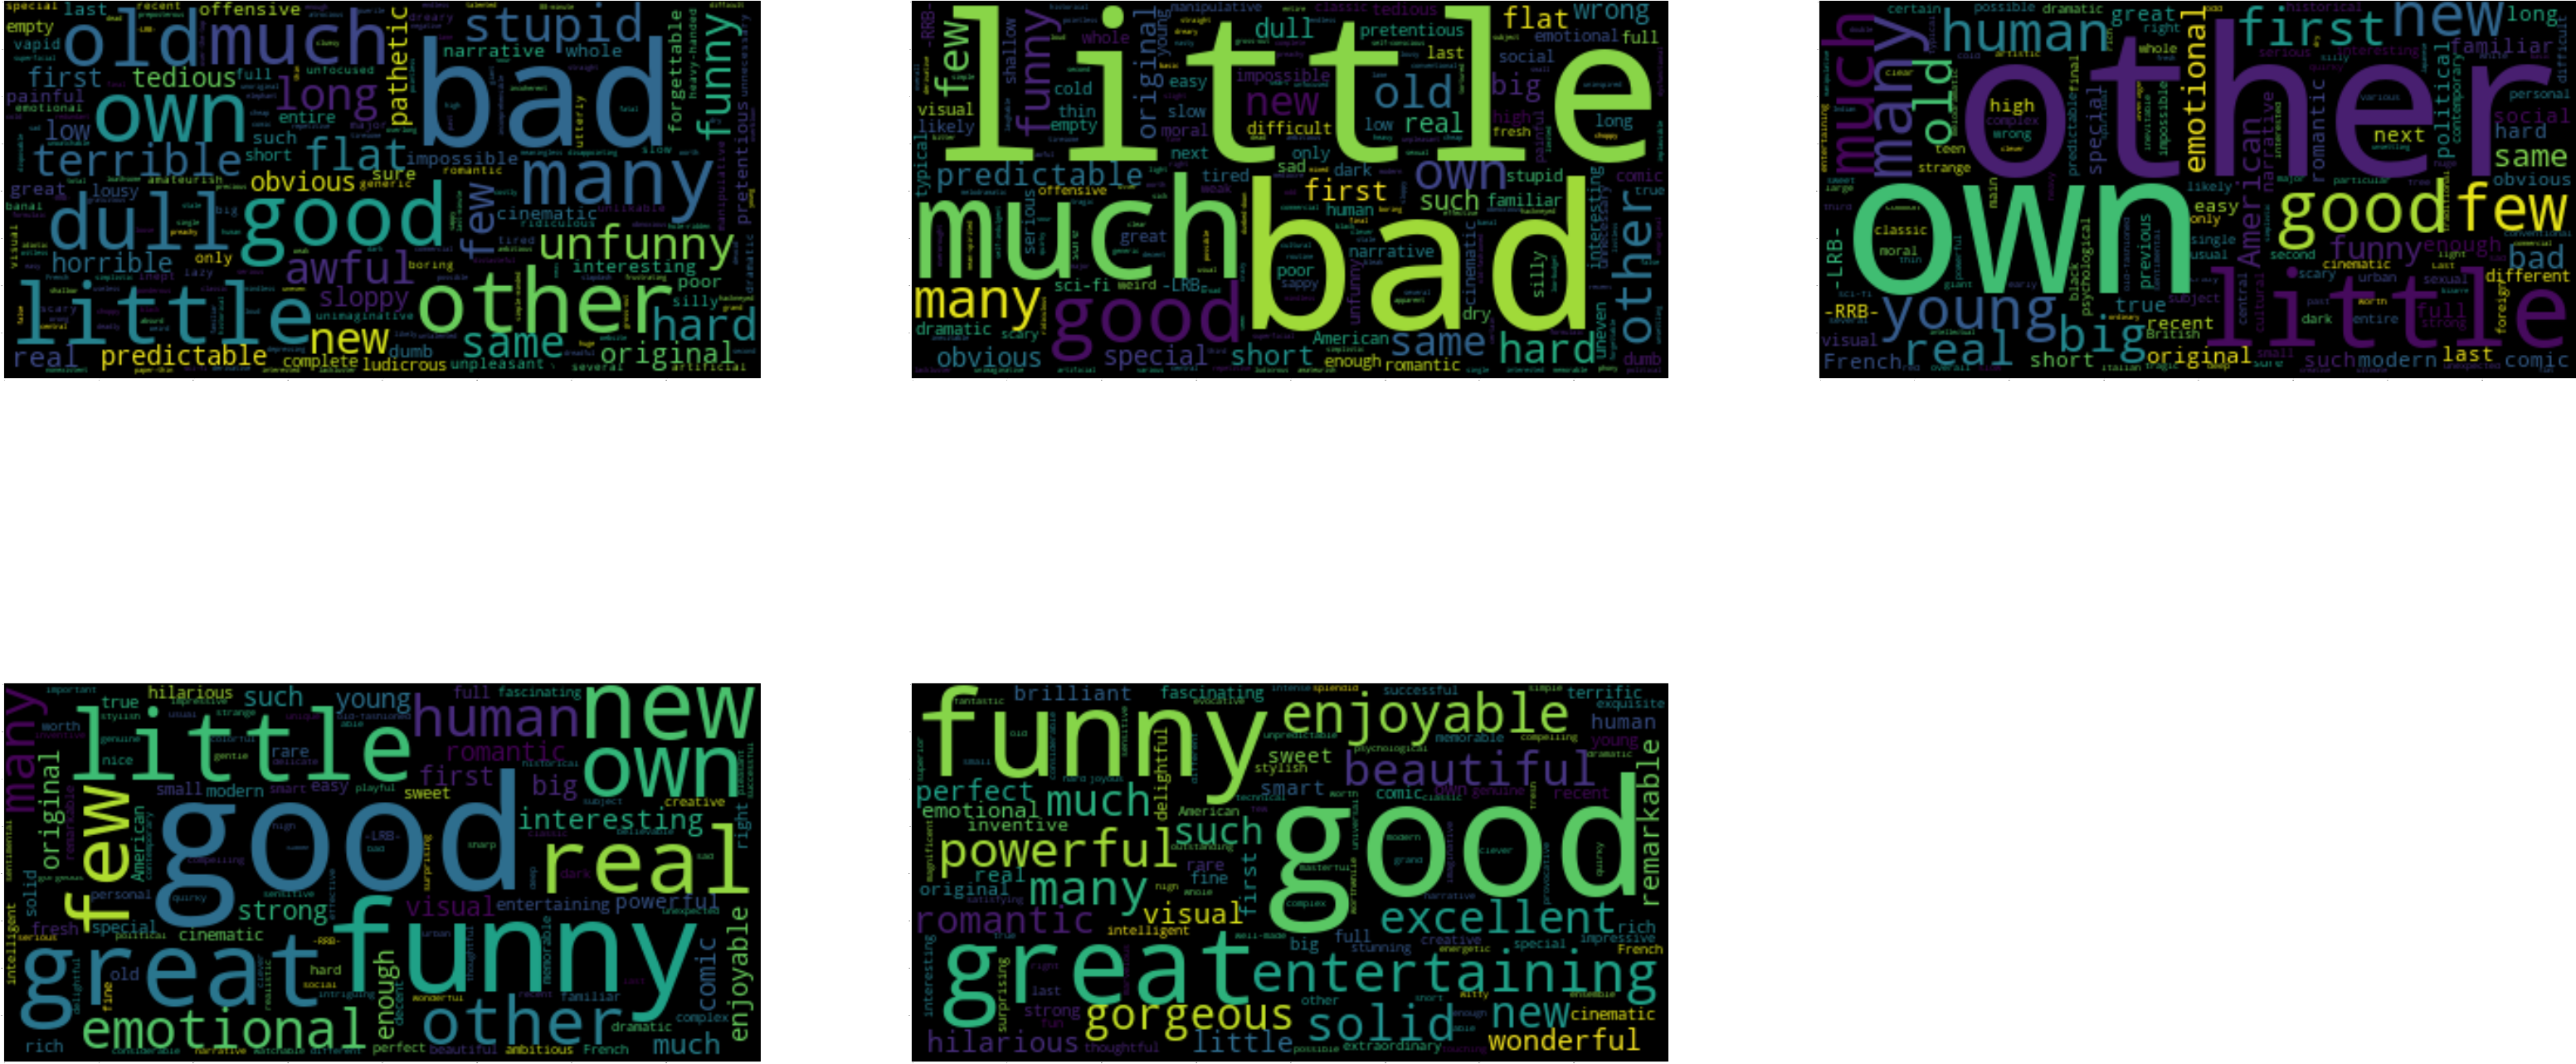

In [25]:
plt.figure(figsize=(400,200), dpi=10)
for s in range(5):
    plt.subplot(2, 3, s+1)
    wordcloud = WordCloud(stopwords=nltk_stopwords).generate_from_frequencies(adjs_counter[s])
    plt.imshow(wordcloud, interpolation='bilinear')

## Most popular NEs

In [26]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [27]:
sentence = "Amin and Diego are working for Macquarie university since 2000 and 2017."
doc = nlp(sentence)
[(X.text, X.label_) for X in doc.ents]

[('Diego', 'ORG'),
 ('Macquarie university', 'ORG'),
 ('2000', 'DATE'),
 ('2017', 'DATE')]

In [28]:
doc.ents

(Diego, Macquarie university, 2000, 2017)

In [29]:
def get_entities(text):
    doc = nlp(text)
    return doc.ents

In [30]:
data['Entities'] = data['Phrase'].apply(get_entities)

In [31]:
entities_counter = [Counter(data[data['Sentiment'] == s]['Entities'].agg(sum)) for s in range(5)]

In [32]:
for i, c in enumerate(entities_counter):
    print("Sentiment:", i, "Entities:", c.most_common(5))

Sentiment: 0 Entities: [(Every Day, 1), (fatal script error, 1), (Tartakovsky, 1), (five, 1), (Williams, 1)]
Sentiment: 1 Entities: [(Ismail Merchant 's, 1), (soap opera, 1), (Snow Dogs, 1), (one, 1), (Snow Dogs, 1)]
Sentiment: 2 Entities: [(Ismail Merchant 's, 1), (Ismail Merchant 's, 1), (Ismail Merchant 's, 1), (Ismail Merchant 's, 1), (Ismail, 1)]
Sentiment: 3 Entities: [(juicy soap opera, 1), (Bartlett, 1), (Bartlett, 1), (Bartlett, 1), (Bartlett, 1)]
Sentiment: 4 Entities: [(Snow Dogs, 1), (the year, 1), (the year, 1), (first, 1), (first, 1)]


The following code is a variant that uses NLTK's NE recogniser. The code can show the NEs but the entities are not counted. If you run this code in your local machine, you will see a graphic of a tree showing all the entities. If you run this on a cloud instance, you will likely see a text representation of the tree instead.

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/diego/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/diego/nltk_data...
[nltk_data]   Package words is already up-to-date!


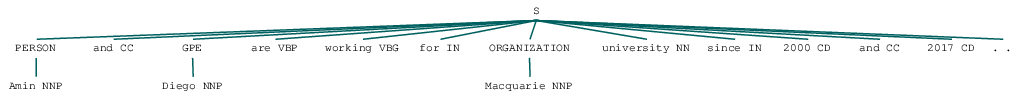

In [33]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
ne = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
ne

From https://stackoverflow.com/questions/31836058/nltk-named-entity-recognition-to-a-python-list:

In [34]:
from nltk.tree import Tree
from nltk import ne_chunk, pos_tag, word_tokenize

def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None
    continuous_chunk = []
    current_chunk = []

    for i in chunked:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue
    if current_chunk:
        named_entity = " ".join(current_chunk)
        if named_entity not in continuous_chunk:
            continuous_chunk.append(named_entity)
            current_chunk = []
    return continuous_chunk

In [35]:
get_continuous_chunks(sentence)

['Amin', 'Diego', 'Macquarie']

In [36]:
data['Entities NLTK'] = data['Phrase'].apply(get_continuous_chunks)

In [37]:
nltk_entities_counter = [Counter(data[data['Sentiment'] == s]['Entities NLTK'].agg(sum)) for s in range(5)]

In [38]:
for i, c in enumerate(nltk_entities_counter):
    print("Sentiment:", i, "Entities:", c.most_common(5))

Sentiment: 0 Entities: [('Hollywood', 46), ('Harvard', 17), ('Adam Sandler', 13), ('French', 13), ('Rock', 12)]
Sentiment: 1 Entities: [('Hollywood', 95), ('American', 65), ('Disney', 33), ('DVD', 26), ('Seagal', 26)]
Sentiment: 2 Entities: [('American', 253), ('Hollywood', 211), ('French', 120), ('America', 99), ('British', 87)]
Sentiment: 3 Entities: [('American', 120), ('Hollywood', 116), ('French', 92), ('America', 46), ('Disney', 39)]
Sentiment: 4 Entities: [('American', 45), ('French', 37), ('Hollywood', 31), ('IMAX', 22), ('Washington', 22)]
